In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# (Optional) Evaluate the model on the validation set
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

# Metrics

In [2]:
models_list = pd.DataFrame()

In [3]:
from sklearn import metrics
import numpy as np

def regressionMetrics(y, yhat):
    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        'RMSLE': np.sqrt(metrics.mean_squared_log_error(np.abs(y), np.abs(yhat))),
        'R2': metrics.r2_score(y, yhat)  # "accuracy" for regression
    }
    return res

Load the file

In [4]:
df = pd.read_pickle('/content/df_model.pkl')


In [5]:
df.to_csv('/content/df_model.csv', index=False)


Use head, describe and info to get to know the data

In [6]:
df.head()

,id,number_of_episodes,vote_count,vote_average,status,origin_country,episode_run_time,en,zh,nl,...,sci-fi & fantasy,soap,action & adventure & western,duration_months,first_air_year,first_air_month,last_air_month,first_air_season,last_air_season,popularity
0,119051,8,7506,8.548,returning series,359,0,1,0,0,...,1,0,0,0,2022,11,11,Autumn,Autumn,164.275
1,100088,9,4065,8.658,returning series,359,0,1,0,0,...,0,0,0,2,2023,1,3,Winter,Spring,145.629
2,94997,10,3413,8.448,returning series,359,0,1,0,0,...,1,0,1,2,2022,8,10,Summer,Autumn,182.641
3,99966,12,3335,8.354,returning series,254,65,1,0,0,...,1,0,1,0,2022,1,1,Winter,Winter,107.108
4,92749,6,2392,7.816,ended,359,47,1,0,0,...,1,0,1,2,2022,3,5,Spring,Spring,49.843


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            18822 non-null  int64   
 1   number_of_episodes            18822 non-null  int64   
 2   vote_count                    18822 non-null  int64   
 3   vote_average                  18822 non-null  float64 
 4   status                        18822 non-null  category
 5   origin_country                18822 non-null  category
 6   episode_run_time              18822 non-null  int64   
 7   en                            18822 non-null  int64   
 8   zh                            18822 non-null  int64   
 9   nl                            18822 non-null  int64   
 10  pt                            18822 non-null  int64   
 11  tokyo mx                      18822 non-null  int64   
 12  action & adventure            18822 non-null  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18822.0,210523.413452,28681.898914,3957.0,203910.5,216791.000,229407.7500,251167.000
number_of_episodes,18822.0,10.656891,19.231290,0.0,2.0,6.000,12.0000,504.000
vote_count,18822.0,6.988630,91.237865,0.0,0.0,0.000,1.0000,7506.000
vote_average,18822.0,2.500121,3.533913,0.0,0.0,0.000,6.0000,10.000
episode_run_time,18822.0,15.755127,34.558051,0.0,0.0,0.000,28.0000,2394.000
en,18822.0,0.186537,0.389550,0.0,0.0,0.000,0.0000,1.000
zh,18822.0,0.073106,0.260317,0.0,0.0,0.000,0.0000,1.000
nl,18822.0,0.031931,0.175820,0.0,0.0,0.000,0.0000,1.000
pt,18822.0,0.023377,0.151101,0.0,0.0,0.000,0.0000,1.000
tokyo mx,18822.0,0.007332,0.085314,0.0,0.0,0.000,0.0000,1.000


## Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical columns in df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()               # Create LabelEncoder for each column
    df[col] = le.fit_transform(df[col])  # Transform the categorical column into numeric
    label_encoders[col] = le          # Store the encoder (in case you need to reverse later)

# Check the transformation
print(df[categorical_cols].head())



   status  origin_country  first_air_season  last_air_season
0       5             206                 0                0
1       5             206                 3                1
2       5             206                 2                0
3       5             139                 3                3
4       1             206                 1                1


Use distplot to find the 'popularity' distribution

<Axes: xlabel='popularity', ylabel='Density'>

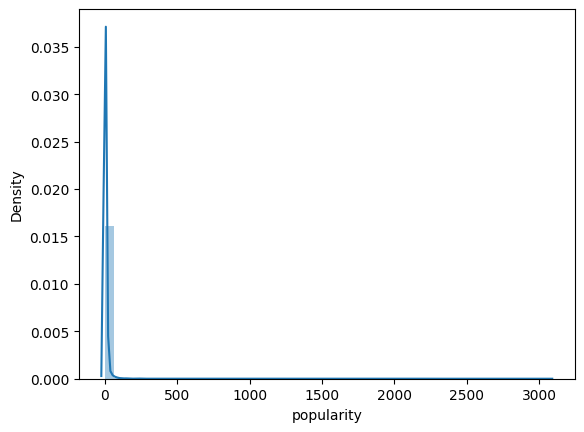

In [10]:
sns.distplot(df.popularity)

Display data correlation

In [11]:
df.corr()

,id,number_of_episodes,vote_count,vote_average,status,origin_country,episode_run_time,en,zh,nl,...,sci-fi & fantasy,soap,action & adventure & western,duration_months,first_air_year,first_air_month,last_air_month,first_air_season,last_air_season,popularity
id,1.000000,-0.094615,-0.180286,-0.282695,0.191221,-0.054206,-0.181352,-0.125769,-0.018040,-0.010814,...,-0.157771,-0.016679,-0.140794,-0.049656,0.486779,0.333104,0.231232,-0.204407,-0.141917,-0.032921
number_of_episodes,-0.094615,1.000000,0.016904,0.127820,-0.042742,-0.051706,0.046475,-0.044634,0.177634,-0.010761,...,0.042878,0.289399,0.055084,0.222001,-0.079774,-0.066324,0.054133,0.040981,-0.051024,0.249102
vote_count,-0.180286,0.016904,1.000000,0.112203,-0.036749,0.050806,0.019117,0.098544,-0.015873,-0.012557,...,0.131358,0.010424,0.106052,0.008767,-0.033896,-0.005965,0.006162,0.005240,0.000839,0.089464
vote_average,-0.282695,0.127820,0.112203,1.000000,-0.276364,0.027753,0.202133,0.159129,0.027179,-0.043765,...,0.133530,0.041364,0.137652,0.019575,-0.076714,-0.071128,-0.004273,0.058082,0.025633,0.087315
status,0.191221,-0.042742,-0.036749,-0.276364,1.000000,0.055462,-0.179173,-0.051007,-0.147810,0.026484,...,-0.128461,-0.018248,-0.079220,0.044715,0.066694,0.047734,0.057122,-0.055100,-0.063282,0.008456
origin_country,-0.054206,-0.051706,0.050806,0.027753,0.055462,1.000000,0.005571,0.212066,-0.270115,-0.080190,...,-0.002882,-0.014430,0.013684,0.039245,-0.042273,-0.028782,-0.041621,-0.001860,0.004453,0.015568
episode_run_time,-0.181352,0.046475,0.019117,0.202133,-0.179173,0.005571,1.000000,0.079665,0.043699,0.068472,...,0.021174,0.018961,0.025591,0.018261,-0.122490,-0.062333,-0.021936,0.033049,0.014731,0.016192
en,-0.125769,-0.044634,0.098544,0.159129,-0.051007,0.212066,0.079665,1.000000,-0.125578,-0.069127,...,0.018740,-0.030457,0.024140,0.041804,-0.012215,-0.009949,-0.009384,0.008884,0.007208,0.022237
zh,-0.018040,0.177634,-0.015873,0.027179,-0.147810,-0.270115,0.043699,-0.125578,1.000000,-0.051005,...,0.104709,-0.011513,0.061755,-0.003489,-0.022410,-0.000146,0.003005,0.027612,0.009155,0.000160
nl,-0.010814,-0.010761,-0.012557,-0.043765,0.026484,-0.080190,0.068472,-0.069127,-0.051005,1.000000,...,-0.030996,-0.008761,-0.031318,0.014131,0.009005,0.004918,0.017842,-0.018208,-0.004906,0.003339


**Overall, there are no particularly strong correlations between most features in the dataset, indicating that the factors** influencing TV show popularity are not heavily interdependent.
However, there are some notable correlations worth mentioning:
*Popularity and Number of Episodes:*

The correlation between popularity and the number of episodes is 0.24, which is relatively weak but still suggests a small positive relationship between these two features. This indicates that shows with more episodes tend to have slightly higher popularity.


Display correlation with heatmap

<Axes: >

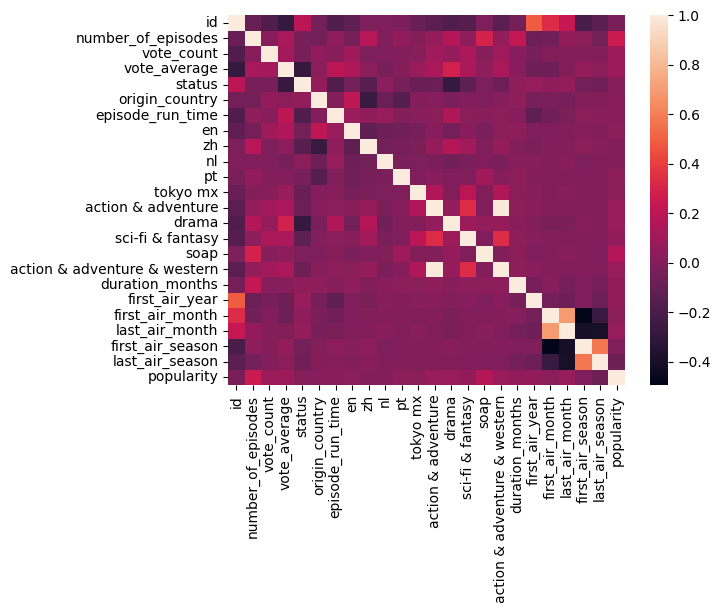

In [12]:
sns.heatmap(df.corr())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            18822 non-null  int64  
 1   number_of_episodes            18822 non-null  int64  
 2   vote_count                    18822 non-null  int64  
 3   vote_average                  18822 non-null  float64
 4   status                        18822 non-null  int64  
 5   origin_country                18822 non-null  int64  
 6   episode_run_time              18822 non-null  int64  
 7   en                            18822 non-null  int64  
 8   zh                            18822 non-null  int64  
 9   nl                            18822 non-null  int64  
 10  pt                            18822 non-null  int64  
 11  tokyo mx                      18822 non-null  int64  
 12  action & adventure            18822 non-null  int64  
 13  d

Creating  a Linear regression  model with depenant value 'price'

In [14]:
df['popularity'].max()

3065.138

In [15]:
X = df.drop(columns=['popularity'])
y = df['popularity']

# Create and Train the Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split train+val into train and val sets (75% train, 25% val from the train+val set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Regression Models

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

### Linear Regression

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Identify categorical columns that contain string values
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])  # Fit and transform on training data
    X_val[col] = le.transform(X_val[col])  # Apply same transformation to validation data

# Now you can fit your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


In [20]:
regressionMetrics(y_val, y_val_pred)

{'MSE': 2227.476499995591,
 'RMSE': np.float64(47.1961492072774),
 'MAE': 9.267760841450725,
 'RMSLE': np.float64(1.1600338445439946),
 'R2': 0.1453449519629363}

In [21]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.4765,47.196149,9.267761,1.160034,0.145345


<Axes: xlabel='popularity'>

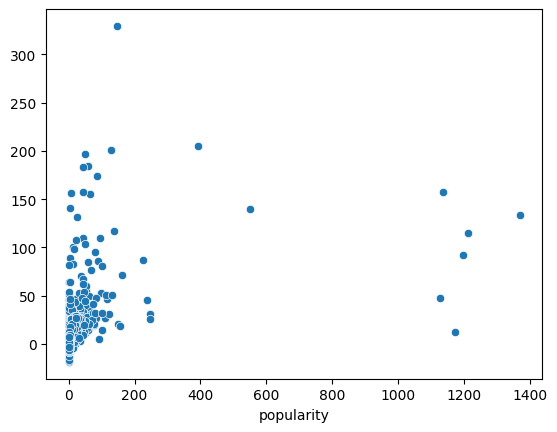

In [22]:
sns.scatterplot(x=y_val, y=y_val_pred)

### Decision Tree

In [23]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred2 = mod2.predict(X_val)

In [24]:
regressionMetrics(y_val, y_val_pred2)

{'MSE': 4653.993707422842,
 'RMSE': np.float64(68.22018548364437),
 'MAE': 7.57505630810093,
 'RMSLE': np.float64(0.6957512330960743),
 'R2': -0.7856795416649891}

In [25]:
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680


<Axes: xlabel='popularity'>

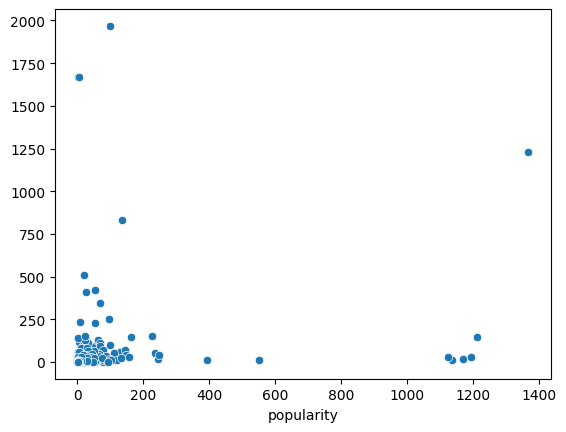

In [26]:
sns.scatterplot(x=y_val, y=y_val_pred2)

### Random Forest


In [27]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred3 = mod3.predict(X_val)

In [28]:
regressionMetrics(y_val, y_val_pred3)

{'MSE': 1745.9601879252386,
 'RMSE': np.float64(41.78468843877191),
 'MAE': 6.034231715803452,
 'RMSLE': np.float64(0.6011211363905362),
 'R2': 0.33009677620167976}

In [29]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680
2,RandomForest,1745.960188,41.784688,6.034232,0.601121,0.330097


<Axes: xlabel='popularity'>

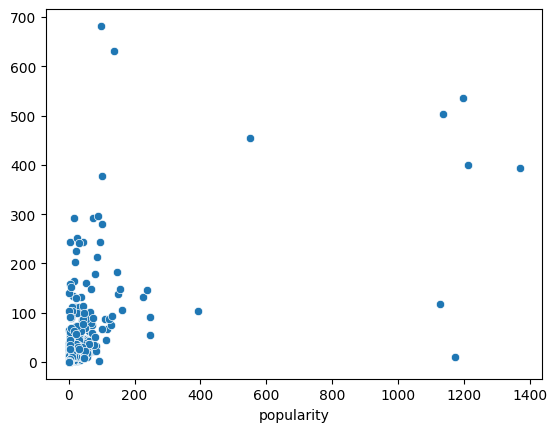

In [30]:
sns.scatterplot(x=y_val, y=y_val_pred3)

### Adaptive Boosting (ADABoost)

In [31]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [32]:
# Make predictions on the validation set
y_val_pred4 = mod4.predict(X_val)

In [33]:
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680
2,RandomForest,1745.960188,41.784688,6.034232,0.601121,0.330097
3,ADABoost,3232.130097,56.851826,33.346879,2.395857,-0.240128


<Axes: xlabel='popularity'>

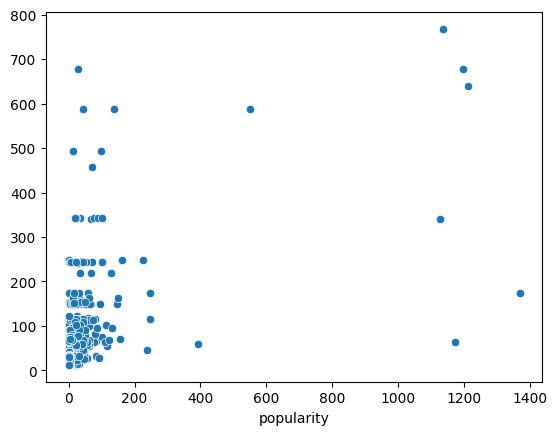

In [34]:
sns.scatterplot(x=y_val, y=y_val_pred4)

### Gradient Boosting Machine (GBM)

In [35]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [36]:
# Make predictions on the validation set
y_val_pred5 = mod5.predict(X_val)

In [37]:
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680
2,RandomForest,1745.960188,41.784688,6.034232,0.601121,0.330097
3,ADABoost,3232.130097,56.851826,33.346879,2.395857,-0.240128
4,GBM,1798.416854,42.407745,6.873356,0.785214,0.309970


<Axes: xlabel='popularity'>

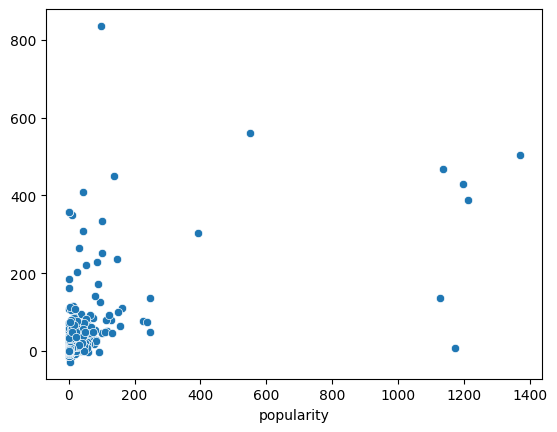

In [38]:
sns.scatterplot(x=y_val, y=y_val_pred5)

### Support Vector Machine (SVM)

In [39]:
mod6 = SVR()
mod6.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred6 = mod6.predict(X_val)

In [40]:
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680
2,RandomForest,1745.960188,41.784688,6.034232,0.601121,0.330097
3,ADABoost,3232.130097,56.851826,33.346879,2.395857,-0.240128
4,GBM,1798.416854,42.407745,6.873356,0.785214,0.309970
5,SVM,2633.173587,51.314458,6.320060,0.937791,-0.010316


<Axes: xlabel='popularity'>

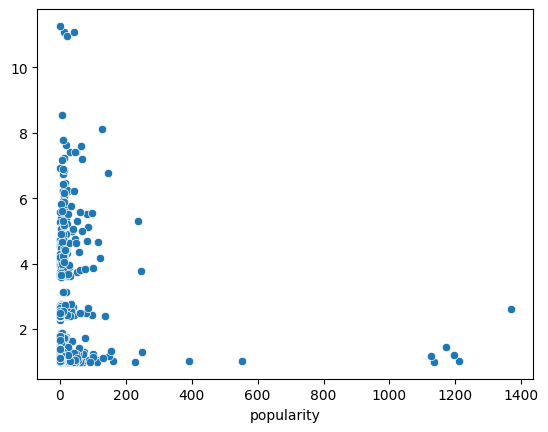

In [41]:
sns.scatterplot(x=y_val, y=y_val_pred6)

### XGBoost Regressor

In [42]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred7 = mod7.predict(X_val)

In [43]:
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680
2,RandomForest,1745.960188,41.784688,6.034232,0.601121,0.330097
3,ADABoost,3232.130097,56.851826,33.346879,2.395857,-0.240128
4,GBM,1798.416854,42.407745,6.873356,0.785214,0.309970
5,SVM,2633.173587,51.314458,6.320060,0.937791,-0.010316
6,XGB,1898.708881,43.574177,6.399182,0.688211,0.271489


<Axes: xlabel='popularity'>

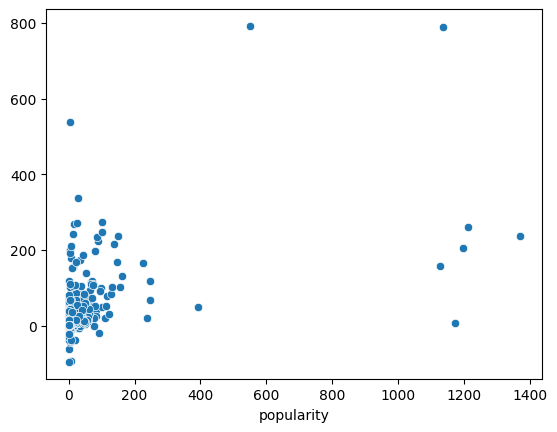

In [44]:
sns.scatterplot(x=y_val, y=y_val_pred7)

In [45]:
## Model Selection

Metrics:<br><b>MSE</b> - Mean Squared Error<br><b>RMSE</b> Root Mean Squared Error<br><b>MAE </b>Mean Absolute Error Calculates the average of the absolute differences between predicted and actual values.<br>
<b>RMSLE</b> Root Mean Squared Logarithmic Error

In [46]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE,R2
2,RandomForest,1745.960188,41.784688,6.034232,0.601121,0.330097
5,SVM,2633.173587,51.314458,6.320060,0.937791,-0.010316
6,XGB,1898.708881,43.574177,6.399182,0.688211,0.271489
4,GBM,1798.416854,42.407745,6.873356,0.785214,0.309970
1,Decision Tree,4653.993707,68.220185,7.575056,0.695751,-0.785680
0,Linear Regression,2227.476500,47.196149,9.267761,1.160034,0.145345
3,ADABoost,3232.130097,56.851826,33.346879,2.395857,-0.240128


**Random Forest** performs the best overall, with the lowest MSE, RMSE, and MAE, and the highest R², while SVM and Decision Tree perform poorly. **XGBoost and GBM** offer competitive performances but are not significantly better than Random Forest. Linear Regression and AdaBoost also show relatively weak performance

# Hyperparameters and Finetuning

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Random Search: we decide which parameters and how (randomly)

In [48]:
# Reduced number of options for each hyperparameter
n_estimators = [100, 200, 300]  # Fewer values for the number of trees
max_features = ['auto','sqrt']  #  # Number of features to consider at each split
max_depth = [10, 20, 30, 40, None]  # Fewer values for max depth
min_samples_split = [2, 5, 10]  # Keep essential options only
min_samples_leaf = [1, 2, 4]  # Reduced options for leaf samples
bootstrap = [True, False]  # Keep as is

# Create a lighter random grid
lighter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(lighter_grid)

# Reduced number of iterations and cross-validation folds
rf_random = RandomizedSearchCV(estimator=mod3, param_distributions=lighter_grid, n_iter=25, cv=3,
                              verbose=2, random_state=42, n_jobs=1)


# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [49]:
import pickle

# Save the RandomizedSearchCV model to a pickle file
with open('rf_random_model.pkl', 'wb') as f:
    pickle.dump(rf_random, f)

print("Model has been saved successfully!")


Model has been saved successfully!


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate(model, test_features, test_labels):
    # Make predictions
    predictions = model.predict(test_features)

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(abs(predictions - test_labels))

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))

    # Print model performance
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(mae))
    print('Root Mean Squared Error: {:0.4f}'.format(rmse))

    # Return both MAE and RMSE
    return mae, rmse


# Running Base model and best estimator from RandomizedSearchCV

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Function to evaluate the model
def evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MAE, RMSE, and R²
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Fit the base model
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# Evaluate the base model (returns MAE, RMSE, and R²)
base_mae, base_rmse, base_r2 = evaluate(base_model, X_test, y_test)

# Get the best estimator from RandomizedSearchCV and evaluate it (returns MAE, RMSE, and R²)
best_random = rf_random.best_estimator_
random_mae, random_rmse, random_r2 = evaluate(best_random, X_test, y_test)

# Calculate the improvements in MAE and RMSE (R² is not in percentage)
mae_improvement = 100 * (base_mae - random_mae) / base_mae
rmse_improvement = 100 * (base_rmse - random_rmse) / base_rmse

# Print the improvements and R² values
print(f'Improvement in MAE: {mae_improvement:0.2f}%')
print(f'Improvement in RMSE: {rmse_improvement:0.2f}%')
print(f'Base R²: {base_r2:0.3f}')
print(f'Optimized R²: {random_r2:0.3f}')


Improvement in MAE: 5.38%
Improvement in RMSE: -8.60%
Base R²: 0.402
Optimized R²: 0.295


In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for XGBoost
learning_rate = [0.01, 0.05, 0.1, 0.2]  # Learning rate options
n_estimators = [100, 200, 300]  # Number of boosting rounds (trees)
max_depth = [3, 6, 10, 12, 15]  # Maximum depth of trees
min_child_weight = [1, 2, 3, 5]  # Minimum sum of instance weight in a child
subsample = [0.8, 0.9, 1.0]  # Fraction of samples to use in training
colsample_bytree = [0.8, 0.9, 1.0]  # Fraction of features to use in each tree
gamma = [0, 0.1, 0.2, 0.3]  # Regularization term
alpha = [0, 0.1, 0.5, 1]  # L1 regularization term
lambda_ = [1, 2, 3]  # L2 regularization term
booster = ['gbtree', 'gblinear', 'dart']  # Type of booster to use

# Create a lighter hyperparameter grid for XGBoost
lighter_grid_xgb = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'gamma': gamma,
    'alpha': alpha,
    'lambda': lambda_,
    'booster': booster
}

print(lighter_grid_xgb)

# Create the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Create the RandomizedSearchCV model with XGBoost and the lighter grid
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=lighter_grid_xgb, n_iter=25, cv=3,
                                verbose=2, random_state=42, n_jobs=1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

# Get the best estimator and print it
best_xgb_model = xgb_random.best_estimator_
print("Best XGBoost Model: ", xgb_random.best_params_)

# You can then evaluate the best model on the test set
y_pred_xgb = best_xgb_model.predict(X_test)


{'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 10, 12, 15], 'min_child_weight': [1, 2, 3, 5], 'subsample': [0.8, 0.9, 1.0], 'colsample_bytree': [0.8, 0.9, 1.0], 'gamma': [0, 0.1, 0.2, 0.3], 'alpha': [0, 0.1, 0.5, 1], 'lambda': [1, 2, 3], 'booster': ['gbtree', 'gblinear', 'dart']}
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END alpha=0.1, booster=gblinear, colsample_bytree=1.0, gamma=0, lambda=2, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, booster=gblinear, colsample_bytree=1.0, gamma=0, lambda=2, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, booster=gblinear, colsample_bytree=1.0, gamma=0, lambda=2, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END alpha=0.1, booster=dart, colsample_bytree=0.9,

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from xgboost import XGBRegressor

# Function to evaluate the model
def evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MAE, RMSE, and R²
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Fit the base model (XGBoost) for comparison (without hyperparameter tuning)
base_model = XGBRegressor(random_state=42)
base_model.fit(X_train, y_train)

# Evaluate the base XGBoost model (returns MAE, RMSE, and R²)
base_mae, base_rmse, base_r2 = evaluate(base_model, X_test, y_test)

# Get the best estimator from RandomizedSearchCV (optimized XGBoost model)
best_xgb_model = xgb_random.best_estimator_

# Evaluate the optimized XGBoost model (returns MAE, RMSE, and R²)
xgb_mae, xgb_rmse, xgb_r2 = evaluate(best_xgb_model, X_test, y_test)

# Calculate the improvements in MAE and RMSE (R² is not in percentage)
mae_improvement = 100 * (base_mae - xgb_mae) / base_mae
rmse_improvement = 100 * (base_rmse - xgb_rmse) / base_rmse

# Print the improvements and R² values
print(f'Improvement in MAE: {mae_improvement:0.2f}%')
print(f'Improvement in RMSE: {rmse_improvement:0.2f}%')
print(f'Base XGBoost R²: {base_r2:0.3f}')
print(f'Optimized XGBoost R²: {xgb_r2:0.3f}')


Improvement in MAE: 14.26%
Improvement in RMSE: 0.33%
Base XGBoost R²: 0.318
Optimized XGBoost R²: 0.323


## Conclusion

#XGBoost has better improvements in MAE and RMSE compared to Random Forest Regressor, especially in terms of MAE (14.26% vs. 5.38%).

Random Forest Regressor's R² dropped slightly after optimization, while XGBoost showed an improvement in R² after optimization.

XGBoost appears to be a more promising model, especially after optimization, showing a better overall performance.

#Refining the hyperparameters, employing cross-validation, and ensuring better feature engineering will likely improve model performance further.
